<a href="https://colab.research.google.com/github/heesukjang/W266_NLP_With_DeepLearning/blob/main/Final_Project/EDA_with_Baseline_SimpleBERT_Automated_Essay_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baseline: A Simple Pre-Trained BERT for the Text Classification - Automated 

To set up a BERT model for a classification task using essays as an input, you can follow these general steps:

1. Data preprocessing: Preprocess the essays by tokenizing them into individual words and applying any necessary cleaning or normalization techniques.

2. Data splitting: Split the preprocessed essays into training, validation, and test sets.

3. Model architecture: Choose a pre-trained BERT model (e.g., BERT base, BERT large) and adapt it for your classification task by adding a classification layer on top of the BERT output.

4. Fine-tuning: Fine-tune the pre-trained BERT model on the training set by minimizing a suitable loss function. During fine-tuning, the weights of the BERT model will be updated to better fit the specific classification task.

5. Evaluation: Evaluate the fine-tuned model on the validation set to tune any hyperparameters (e.g., learning rate, number of epochs). After finalizing the hyperparameters, evaluate the model on the test set to obtain the final performance metrics.

6. Inference: Use the trained BERT model to predict the classification label for new essays by passing them through the preprocessed and fine-tuned model.

There are many libraries and frameworks available to help you set up a BERT model for classification tasks, such as Hugging Face's Transformers library in Python. You can find many tutorials and code examples online to help you get started.

## A sample Python code to train a BERT model for text classification using the PyTorch library:

In [1]:
# import torch
# import torch.nn as nn
# from transformers import BertModel, BertTokenizer
# from torch.utils.data import DataLoader, Dataset

# class MyDataset(Dataset):
#     def __init__(self, data, tokenizer, max_len):
#         self.tokenizer = tokenizer
#         self.data = data
#         self.max_len = max_len
    
#     def __len__(self):
#         return len(self.data)
    
#     def __getitem__(self, index):
#         text = self.data[index]['text']
#         label = self.data[index]['label']
#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_len,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors='pt',
#         )
#         return {
#             'text': text,
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'label': torch.tensor(label, dtype=torch.long)
#         }

# class BERTClassifier(nn.Module):
#     def __init__(self, num_classes):
#         super(BERTClassifier, self).__init__()
#         self.bert = BertModel.from_pretrained('bert-base-uncased')
#         self.dropout = nn.Dropout(p=0.1)
#         self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)
    
#     def forward(self, input_ids, attention_mask):
#         output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         output = self.dropout(output.pooler_output)
#         output = self.classifier(output)
#         return output

# def train(model, train_loader, criterion, optimizer, device):
#     model.train()
#     train_loss = 0.0
#     correct = 0
#     total = 0
#     for batch in train_loader:
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         label = batch['label'].to(device)
#         optimizer.zero_grad()
#         output = model(input_ids, attention_mask)
#         loss = criterion(output, label)
#         train_loss += loss.item() * input_ids.size(0)
#         loss.backward()
#         optimizer.step()
#         pred = torch.argmax(output, dim=1)
#         correct += (pred == label).sum().item()
#         total += input_ids.size(0)
#     train_acc = 100 * correct / total
#     train_loss = train_loss / total
#     return train_loss, train_acc

# def validate(model, val_loader, criterion, device):
#     model.eval()
#     val_loss = 0.0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for batch in val_loader:
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             label = batch['label'].to(device)
#             output = model(input_ids, attention_mask)
#             loss = criterion(output, label)
#             val_loss += loss.item() * input_ids.size(0)
#             pred = torch.argmax(output, dim=1)
#             correct += (pred == label).sum().item()
#             total += input_ids.size(0)
#     val_acc = 100 * correct / total
#     val_loss = val_loss / total
#     return val_loss, val_acc

# def train_model(train_data, val_data, batch_size, max_len, num_classes, num_epochs, learning_rate, device):
#     tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#     train_dataset = MyDataset(train_data, tokenizer, max


# Regenerate response


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.2 MB/s eta 0:00:00


In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import transformers
print(f'transformers version: {transformers.__version__}')
from transformers import logging as hf_logging
hf_logging.set_verbosity_error()

transformers version: 4.26.1


In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
import sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.layer_utils import count_params

from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Multiply
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import PReLU
from keras.layers.core import Activation
from keras.layers.convolutional import SeparableConv1D
from keras.layers.convolutional import SeparableConv2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import *
from keras.applications.resnet import ResNet152
from keras.applications.nasnet import NASNetMobile
from keras.applications.nasnet import NASNetLarge
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.nasnet import preprocess_input
from keras.applications import MobileNetV2
from keras.applications.xception import Xception
from keras.applications.inception_v3 import *

from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img

from tensorflow.python.ops.numpy_ops import np_config

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

from tensorflow.keras.losses import mae
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy

from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# def set_seed(seed = 99):
#     np.random.seed(seed)
#     tf.random.set_seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

# set_seed(20230214)

In [7]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)

In [8]:
train_path = '/content/gdrive/MyDrive/Kaggle/train.csv'
test_path = '/content/gdrive/MyDrive/Kaggle/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [9]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [10]:
test_df.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [11]:
train_df.shape, test_df.shape

((3911, 8), (3, 2))

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [13]:
train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [14]:
label_cols = train_df.columns[2:]
label_cols

Index(['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar',
       'conventions'],
      dtype='object')

In [15]:
train_df[label_cols].drop_duplicates()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,3.5,3.5,3.0,3.0,4.0,3.0
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...
3889,3.5,2.5,3.0,2.5,2.5,2.5
3896,2.0,3.0,3.0,2.5,2.0,2.0
3899,3.5,3.5,4.5,3.5,4.0,4.0
3904,2.5,2.0,2.5,1.5,2.0,2.0


In [16]:
train_df[label_cols].value_counts()

cohesion  syntax  vocabulary  phraseology  grammar  conventions
3.0       3.0     3.0         3.0          2.5      3.0            19
3.5       3.5     3.5         3.5          3.5      3.5            17
2.5       2.5     3.0         2.5          2.5      3.0            17
3.0       3.0     3.0         3.0          2.5      2.5            15
2.5       2.5     3.0         3.0          2.5      2.5            15
                                                                   ..
3.0       3.0     3.5         3.5          2.5      2.5             1
                              3.0          4.0      4.0             1
                                           3.0      2.0             1
                                           2.0      2.5             1
5.0       5.0     5.0         5.0          5.0      5.0             1
Length: 1768, dtype: int64

In [17]:
label_cols

Index(['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar',
       'conventions'],
      dtype='object')

In [18]:
train_df[(train_df.cohesion == 5) & (train_df.syntax == 5) & (train_df.vocabulary == 5) & (train_df.phraseology == 5) & (train_df.grammar == 5) & (train_df.conventions == 5)][['full_text']]

,full_text
2389,I agree with Michelangelo's statement as I hav...


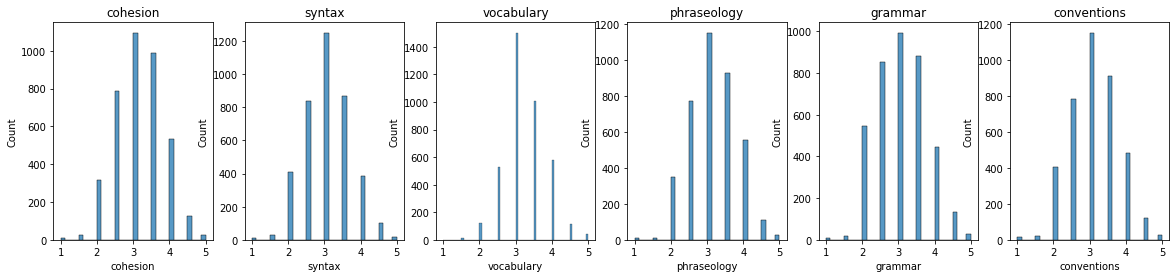

In [19]:
fig, ax = plt.subplots(1, len(label_cols), figsize=(20,4))

for idx, label in enumerate(label_cols):
    sns.histplot(x = label, 
                 data = train_df,
                 ax = ax[idx]
                )
    ax[idx].set_title(label)
    

In [20]:
for label in label_cols:
    train_df[label + '_above_or_below_avg_flag'] = np.where(train_df[label] > np.mean(train_df[label]), 1, 0)

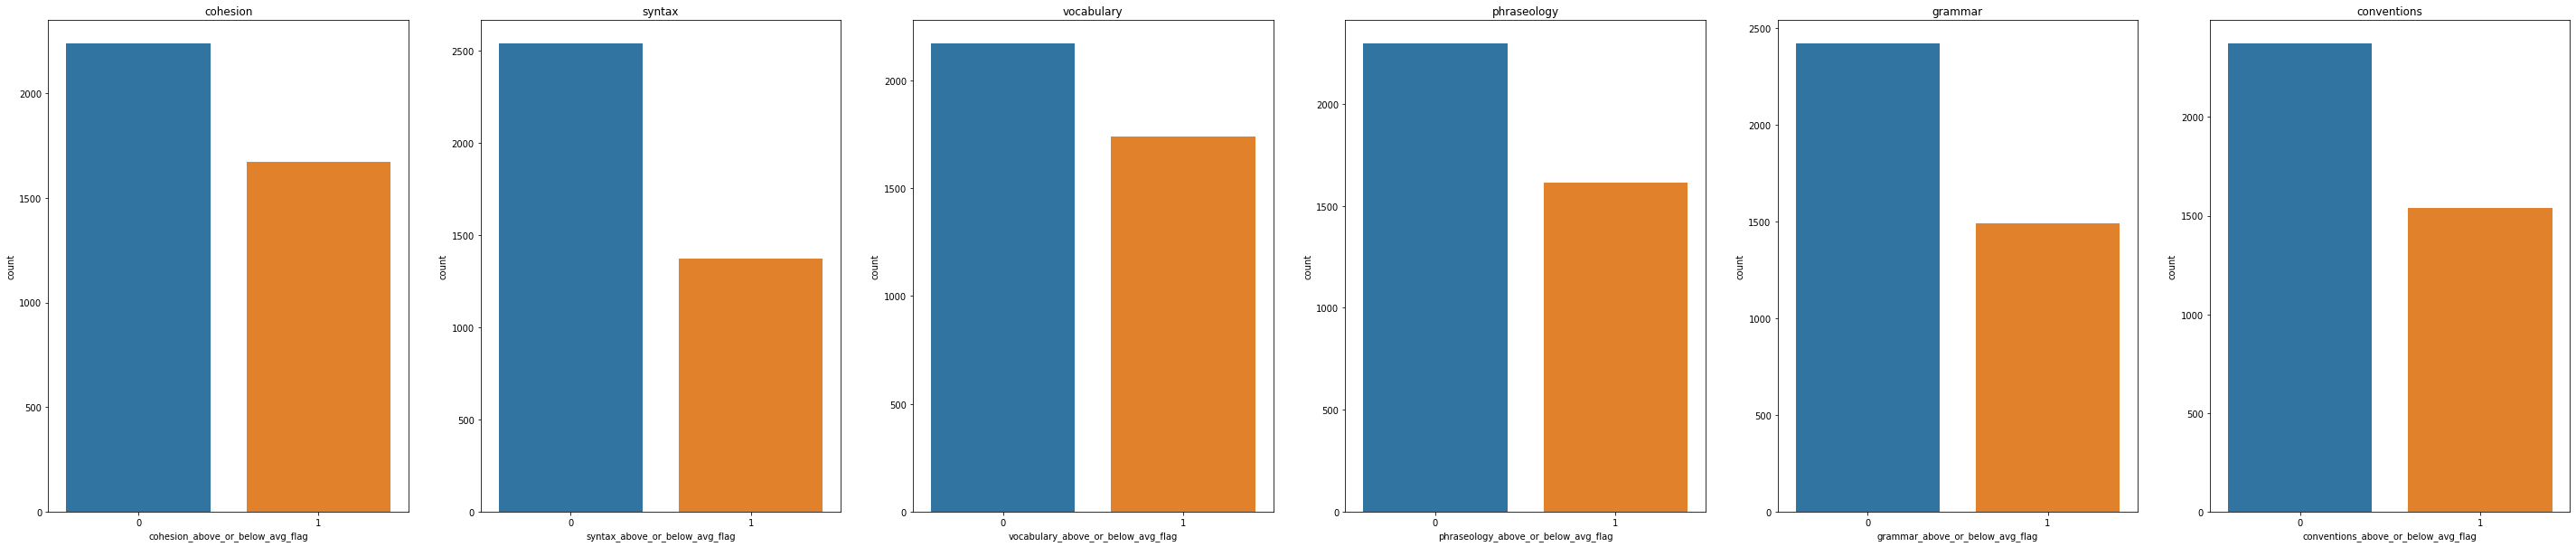

In [21]:
fig, ax = plt.subplots(1, len(label_cols), figsize=(50,10))
for idx, label in enumerate(label_cols):
    sns.countplot(x = train_df[label + '_above_or_below_avg_flag'], ax = ax[idx])
    ax[idx].set_title(label)

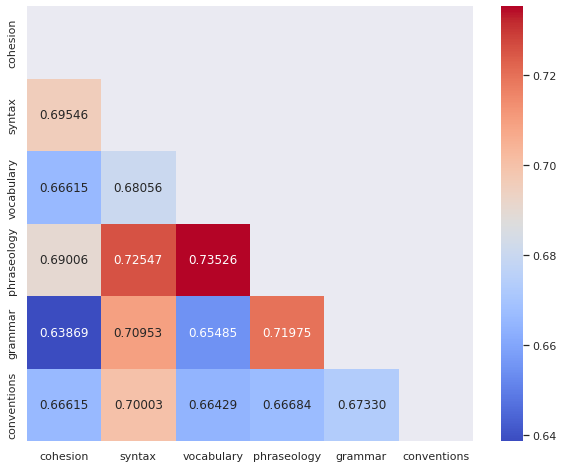

In [22]:
corr = train_df[label_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.set(rc = {"figure.figsize": (10, 8)})

sns.heatmap(corr, 
            annot = True, 
            cmap = "coolwarm", 
            mask = mask,
            fmt  = ".5f")
plt.show()

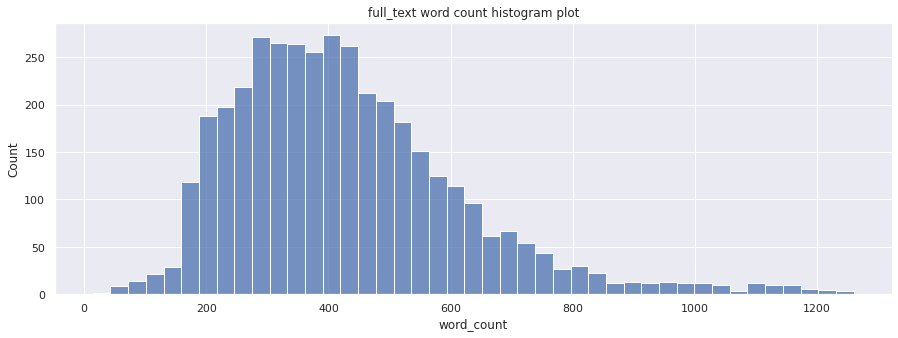

In [23]:
fig = plt.figure(figsize=(15, 5))
train_df['word_count'] = train_df['full_text'].apply(lambda x: len(x.split()))
sns.histplot(data = train_df, x = "word_count")
plt.title("full_text word count histogram plot")
plt.show()

Text(0.5, 1.0, 'full_text length distribution plot')

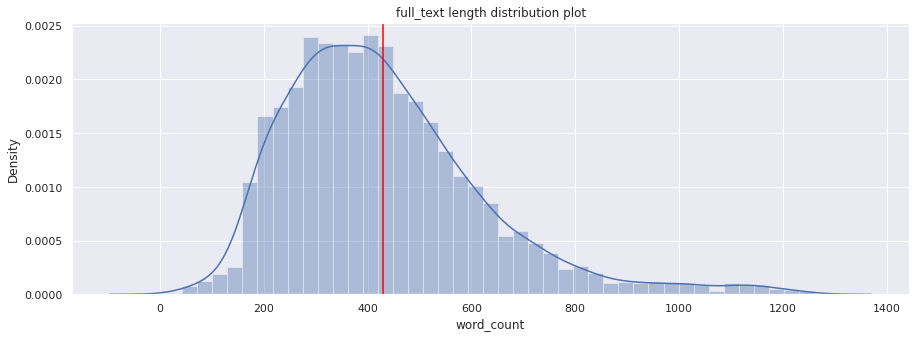

In [24]:
plt.figure(figsize = (15,5))
sns.distplot(train_df['word_count'])
plt.axvline(x = np.mean(train_df['word_count']), color = 'red')
plt.title('full_text length distribution plot')

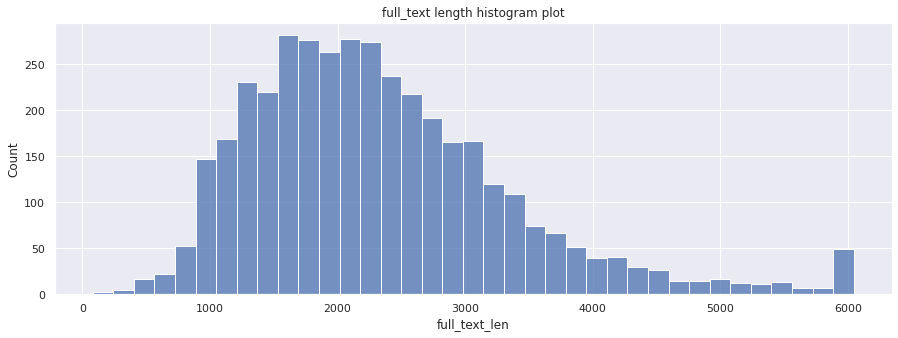

In [25]:
fig = plt.figure(figsize=(15, 5))
train_df['full_text_len'] = train_df['full_text'].apply(lambda x: len(x))
sns.histplot(data = train_df, x = "full_text_len")
plt.title("full_text length histogram plot")
plt.show()

Text(0.5, 1.0, 'full_text length distribution plot')

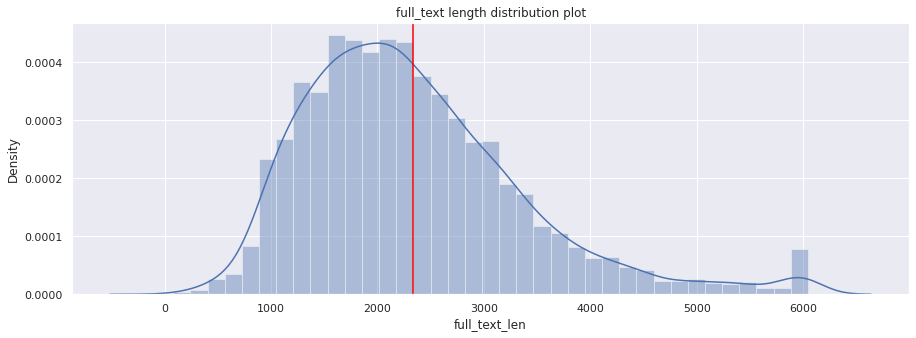

In [26]:
plt.figure(figsize = (15,5))
sns.distplot(train_df['full_text_len'])
plt.axvline(x = np.mean(train_df['full_text_len']), color = 'red')
plt.title('full_text length distribution plot')

In [27]:
train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cohesion_above_or_below_avg_flag,syntax_above_or_below_avg_flag,vocabulary_above_or_below_avg_flag,phraseology_above_or_below_avg_flag,grammar_above_or_below_avg_flag,conventions_above_or_below_avg_flag,word_count,full_text_len
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053,0.427768,0.350805,0.444899,0.412938,0.380977,0.393505,430.492969,2334.522373
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450,0.494818,0.477283,0.497018,0.492425,0.485689,0.488590,191.868449,1033.406009
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,82.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,1597.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,402.000000,2173.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,526.500000,2866.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1260.000000,6044.000000


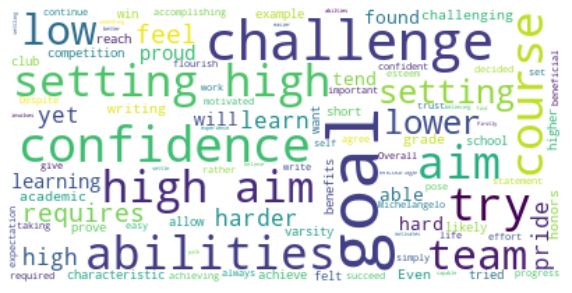

In [28]:
text = train_df[(train_df.cohesion == 5) & 
                (train_df.syntax == 5) & 
                (train_df.vocabulary == 5) & 
                (train_df.phraseology == 5) & 
                (train_df.grammar == 5) & 
                (train_df.conventions == 5)]['full_text'].values[0]
word_cloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
#make it easier to use a variety of BERT subword models
model_checkpoint = 'bert-base-cased'   # case sensitive (care about upper and lower case)

In [30]:
from transformers import BertTokenizer, TFBertModel

bert_tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
bert_model = TFBertModel.from_pretrained(model_checkpoint)

In [31]:
train_texts = train_df['full_text']
train_texts

0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3906    I believe using cellphones in class for educat...
3907    Working alone, students do not have to argue w...
3908    "A problem is a chance for you to do your best...
3909    Many people disagree with Albert Schweitzer's ...
3910    Do you think that failure is the main thing fo...
Name: full_text, Length: 3911, dtype: object

In [32]:
# print(f'len(train_texts)={len(train_texts)} | type(train_texts)={type(train_texts)}')
train_texts = train_texts.values.tolist()
print(f'len(train_texts)={len(train_texts)} | type(train_texts)={type(train_texts)}')

len(train_texts)=3911 | type(train_texts)=<class 'list'>


In [33]:
train_encodings = bert_tokenizer(train_texts, truncation=True, padding=True, max_length=200, return_tensors='tf')

In [34]:
print(f'len(train_encodings.input_ids[:1] = {len(train_encodings.input_ids[:1])}')

SyntaxError: ignored